# Metoda `plot` w bibliotece pandas

Wykresy danych zgromadzonych w strukturach `Series` i `DataFrame` możemy (i w zasadzie powinniśmy) wizualizować dedykowaną metodą biblioteki `pandas`, czyli `DataFrame.plot()` lub `Series.plot()`. Pierwszą róznicą jest brak argumentów, które musimy przekazać do mteody. Przykład domyślnego działania:

<Axes: >

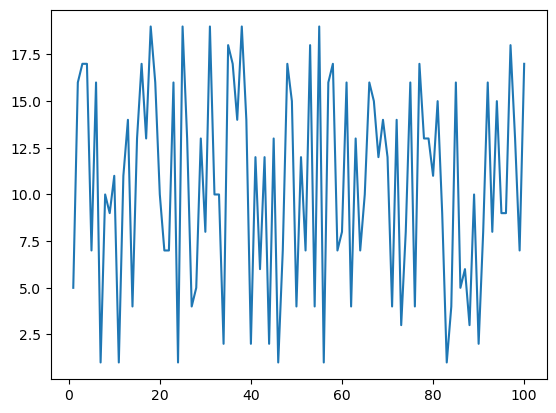

In [1]:
import numpy as np
import pandas as pd

data = np.random.randint(1,20,100)
index = range(1,101)

s1 = pd.Series(data, index=index)
s1.plot()

Możemy wybrać typ szkicowanego wykresu (zamiast domyślnego wykresu liniowego) dodając argument opcjonalny `kind`. Opcje do wyboru:
- `'line'` - domyślny, wykres liniowy
- `'bar'` - pionowy wykres słupkowy
- `'barh'` - poziomy wykres słupkowy
- `'hist'` -histogram
- `'box'` - wykres pudełkowy
- `'kde'` - wykres estymacji jądrowej
- `'density'` - to samo, co `'kde'`
- `'area'` - wykres powierzchniowy
- `'pie'` - wykres kołowy
- `'scatter'` - wykres punktowy *scatter plot*
- `'hexbin'` - wykres *hexbin plot*.

<Axes: >

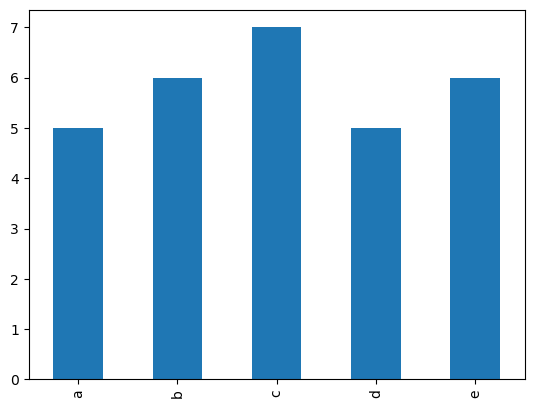

In [2]:
data2 = np.random.randint(5,10,5)
index2 = ['a','b','c','d','e']

s2 = pd.Series(data2, index=index2)
s2.plot(kind='bar')

<Axes: >

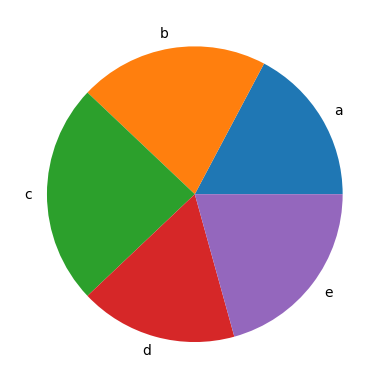

In [3]:
s2.plot(kind='pie')

<Axes: ylabel='Frequency'>

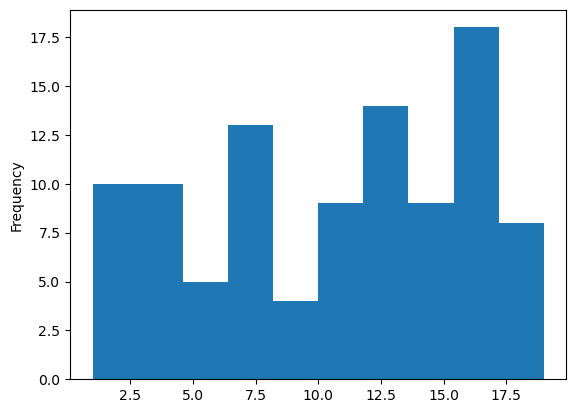

In [4]:
s1.plot(kind='hist')

Pozostałe opcje metody `plot`:  
        
- `ax` - obiekt typu *matplotlib axes object*
- `subplots = True/False` - w przypadku `DataFrame` dane w każdej kolumnie zostaną naszkicowane jako osobne wykresy.
- `sharex = True/False` - jeżeli `subplots=True` ustawia wspólną oś OX dla wszystkich podwykresów.
- `sharey = True/False`- jeżeli `subplots=True` ustawia wspólną oś OY dla wszystkich podwykresów.
- `layout = (n, m)` - układ podwykresów w `n` wierszach i `m` kolumnach.
- `figsize = (x,y)` - rozmiar całego wykresu, w calach.
- `use_index = True/False` - jeżeli `True`, to jako znaczniki na osi OX zostaną użyte indeksy `index`.
- `title`= string lub lista stringów - tytuł dla wykresu (pojedynczy string) lub tytuły dla podwykresów (lista stringów).
- `grid = True/False` - włącza/wyłącza widoczność siatki.
- `legend = True/False` - włącza/wyłącza legendę.
- `style` = lista lub słownik - formatowanie stylów poszczególnych wykresów (lub podwykresów).
- `logx = True/False` - skala logarytmiczna na osi OX.
- `logy = True/False` - skala logarytmiczna na osi OY.
- `loglog = True/False` - skala logarytmiczna na obydwu osiach.
- `xticks` - wartości znaczników na osi OX.
- `yticks` - wartości znaczników na osi OY.
- `xlim = (x_min,x_max)` - zakres na osi OX.
- `ylim = (y_min,y_max)` - zakres na osi OY.
- `xlabel = string` - nazwa osi OX.
- `ylabel = string` - nazwa osi OY.
- `rot = int` - rotacja dla znaczników na osi OX.
- `fontsize = int` - wiekość czcionki znaczników osi.
- `colormap` = `str` lub obiekt *matplotlib colormap* - mapa kolorów.
- `colorbar = True/False` - dodaje *colorbar* do wykresu (dla typów `‘scatter’` i `‘hexbin’`).
- `position = float` - pozycja kolumn dla wykresu typu `'bar'`: 0 (lewy róg), 1 (prawy róg), domyślnie 0.5 (środek).
- `xerr` = `DataFrame`, `Series`, tablica, słownik lub string - zakresy błędów względem x dla wykresu pudełkowego.
- `yerr` = `DataFrame`, `Series`, tablica, słownik lub string - zakresy błędów względem y dla wykresu pudełkowego.
- `stacked = True/False` - wybór typu wykresu słupkowego i histogramu.
- `sort_columns = True/False` - jeżeli `True`, kolumny zostaną posortowane po nazwach przed utworzeniem wykresu.

<Axes: >

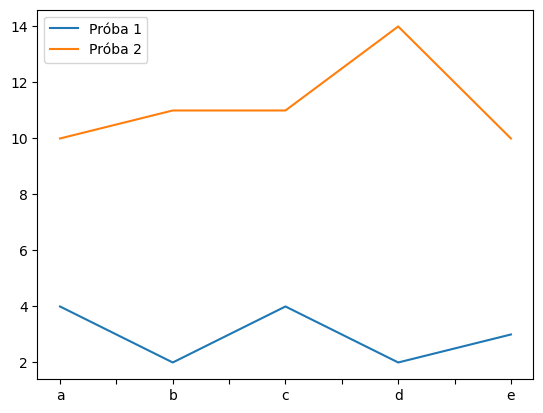

In [5]:
data3a = np.random.randint(1,5,5)
data3b = np.random.randint(10,15,5)

index3=['a','b','c','d','e']

s3a = pd.Series(data3a,index=index3)
s3b = pd.Series(data3b,index=index3)

dic = {'Próba 1':s3a,'Próba 2':s3b}

df1 = pd.DataFrame(dic)

df1.plot()

array([<Axes: >, <Axes: >], dtype=object)

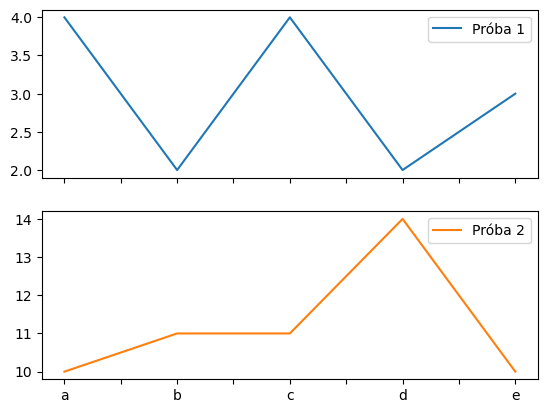

In [6]:
df1.plot(subplots=True)

<Axes: >

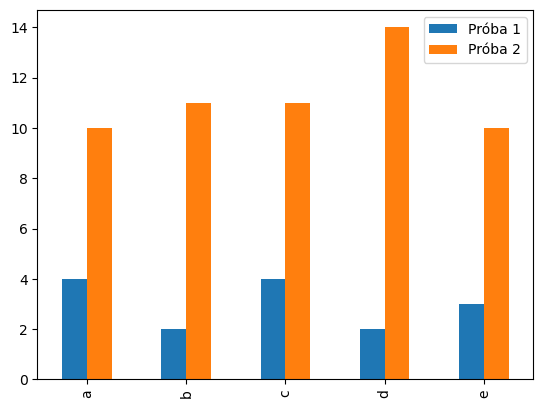

In [7]:
df1.plot(kind='bar')

array([<Axes: title={'center': 'Próba 1'}>,
       <Axes: title={'center': 'Próba 2'}>], dtype=object)

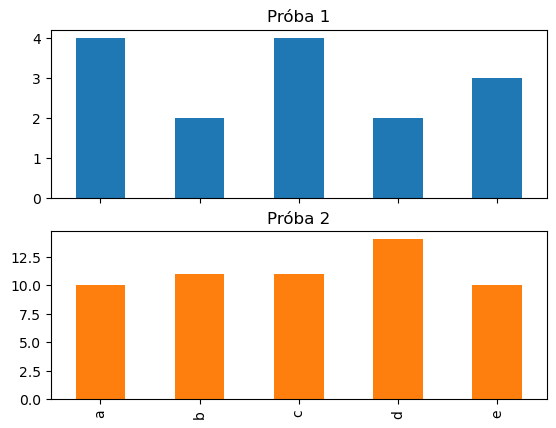

In [8]:
df1.plot(kind='bar',subplots=True, sharex=True,legend=False)

array([<Axes: title={'center': 'Kołowy 1'}, ylabel='Próba 1'>,
       <Axes: title={'center': 'Kołowy 2'}, ylabel='Próba 2'>],
      dtype=object)

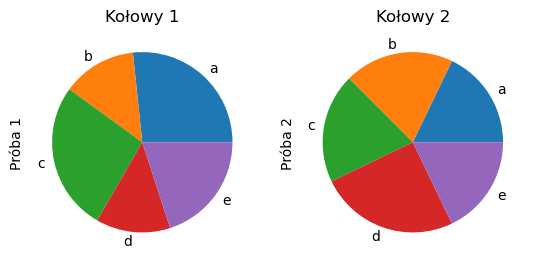

In [9]:
df1.plot(kind='pie',subplots=True,title=['Kołowy 1', 'Kołowy 2'],legend=False)

## Zadanie 1.

Zaimportować plik `kroliki.csv` do ramki danych. Znajdują się tam znane już Państwu dane dotyczące populacji królików, lisów i marchewek na przestrzeni 20 lat (od 1990 do 2010). Zobrazować dane na wspólnym wykresie liniowym. Dodać legendę, siatkę i adekwatne nazwy osi.

<Axes: xlabel='rok', ylabel='Liczebność'>

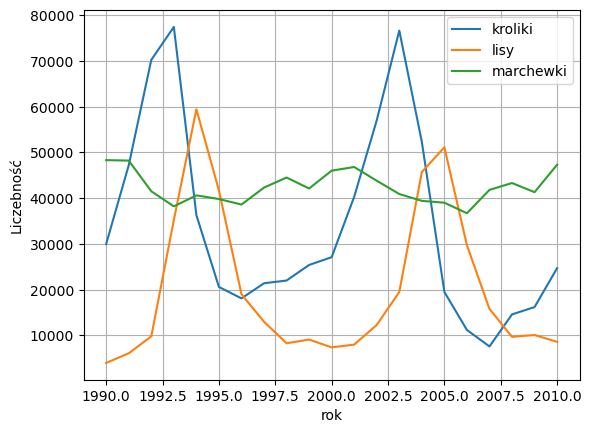

In [10]:
kroliki=pd.read_csv("kroliki.csv", delimiter="\t",index_col="rok")
kroliki.plot(grid=True,ylabel="Liczebność")

## Zadanie 2.

Dane z pierwszych 6 lat przedstawić na wykresach kołowych (jako jedna grafika podzielona na podwykresy w układzie 2 wiersze, 3 kolumny): jeden wykres kołowy odpowiada danym z jednego roku, każdy wykres ma mieć 3 pola: króliki, lisy, marchewki.

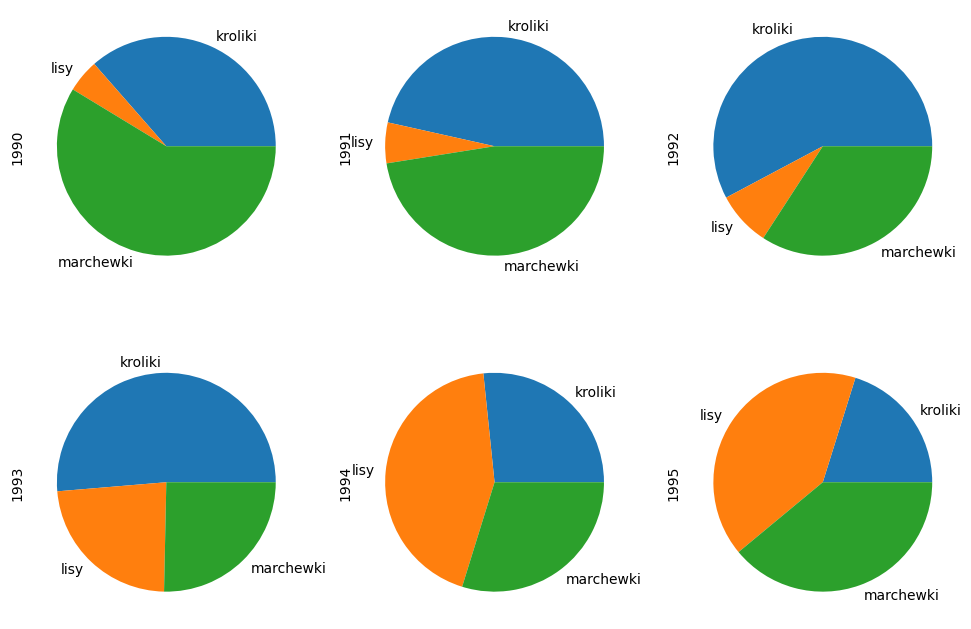

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
for rok in range(6):
    ax = fig.add_subplot(2, 3, rok+1) 
    kroliki.iloc[rok].plot(kind='pie')


## Zadanie 3.

Naszkicować na osobnych wykresach histogramy populacji lisów, królików i marchewek.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

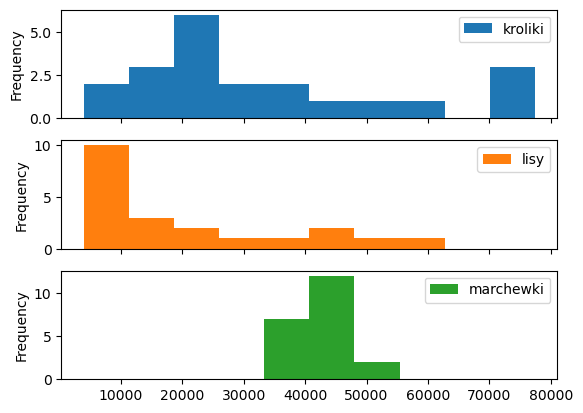

In [12]:
kroliki.plot(kind="hist",subplots=True)

## Zadanie 4.

W folderze Miasta znajdują się pliki z pomiarami temperatury dobowej w czterech miastach i ze sta-
cji na Kasprowym Wierchu w roku 2018. Zaimportować pomiary do struktur danych a następnie:


In [13]:
miasta=["Gorzow","Kasprowy","Krakow","Suwalki","Ustka"]
dane=pd.DataFrame()
for miasto in miasta:
    temp=pd.read_csv(f"{miasto}_2018.csv", encoding="cp1250",header=None,parse_dates={"date" : [2,3,4]},usecols=[2,3,4,5,7,9],index_col='date')
    temp.columns=[f"{miasto}_max",f"{miasto}_min",f"{miasto}_mean"]
    dane=pd.concat([dane,temp],axis=1)
for col in dane.columns:
    dane[col] = dane[col].astype(float)

- naszkicować na wspólnym wykresie liniowym wykresy średnich temperatur dobowych w Gorzowie Wielkopolskim, Suwałkach i na Kasprowym Wierchu;


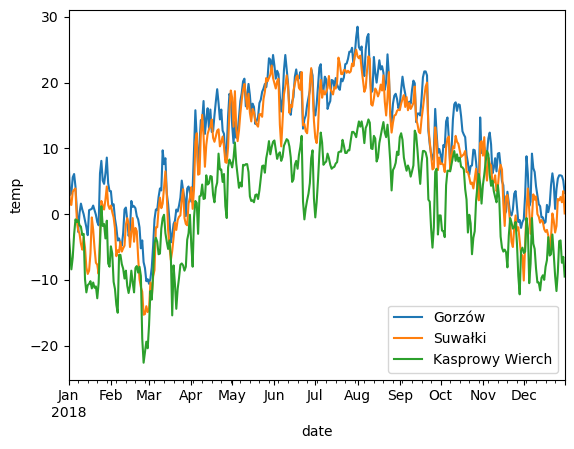

In [14]:
dane[["Gorzow_mean","Suwalki_mean","Kasprowy_mean"]].plot(ylabel="temp").legend(["Gorzów","Suwałki","Kasprowy Wierch"])

- w formie wykresów słupkowych porównać średnie maksymalne temperatury w Krakowie i Suwałkach w kolejnych miesiącach (na osi OX miesiące, na każdym miesiącu dwa słupki: jeden dla Krakowa, drugi dla Suwałk);


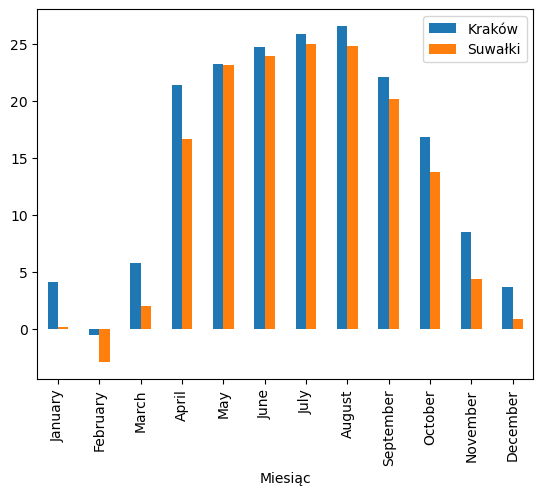

In [15]:
temp=dane[["Krakow_max","Suwalki_max"]].resample(rule="M").mean()
temp.index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp.plot(kind="bar",xlabel="Miesiąc").legend(["Kraków","Suwałki"])

- utworzyć histogramy średnich temperatur w okresie lata kalendarzowego dla Kasprowego Wierchu i Ustki (na wspólnym rysunku);


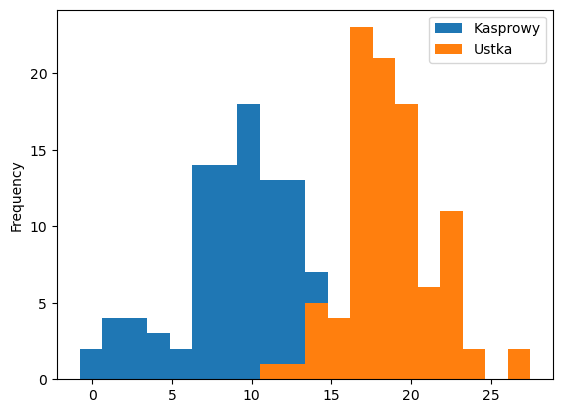

In [16]:
dane[["Kasprowy_mean","Ustka_mean"]].loc['2018-06-22':'2018-09-23'].plot.hist(xlabel="Miesiąc",bins=20).legend(["Kasprowy","Ustka"])

- obliczyć korelację między temperaturami minimalnymi w zimie dla każdej pary stacji pomiarowych.

In [17]:
pary=[(miasta[i], miasta[j]) for i in range(len(miasta)) for j in range(i+1,len(miasta))]
for para in pary:
    print(f'Korelacja pomiędzy {para[0]} a {para[1]} wynosi: {dane[[f"{para[0]}_min",f"{para[1]}_min"]].drop(dane.loc["2018-03-21":"2018-12-22"].index).corr().values[0][1]}')
    

Korelacja pomiędzy Gorzow a Kasprowy wynosi: 0.7091758219305908
Korelacja pomiędzy Gorzow a Krakow wynosi: 0.8329274825042163
Korelacja pomiędzy Gorzow a Suwalki wynosi: 0.8685684385954447
Korelacja pomiędzy Gorzow a Ustka wynosi: 0.9416264992618865
Korelacja pomiędzy Kasprowy a Krakow wynosi: 0.7549149667189782
Korelacja pomiędzy Kasprowy a Suwalki wynosi: 0.7280361402302992
Korelacja pomiędzy Kasprowy a Ustka wynosi: 0.666021469466377
Korelacja pomiędzy Krakow a Suwalki wynosi: 0.8218551073343269
Korelacja pomiędzy Krakow a Ustka wynosi: 0.7762908522221333
Korelacja pomiędzy Suwalki a Ustka wynosi: 0.885025896439618
